<a href="https://colab.research.google.com/github/marjananooshiravani/Finding_the_Best-_itting_Model/blob/main/Pathrise_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(1)

1


# Pathrise
## machine learning prediction

The main goal of this analysis is to derive insights around if candidates will ultimately be placed at a company and how long until a placement can be expected.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


In [ ]:
url = "/content/drive/MyDrive/Data_Pathrise.csv"
df = pd.read_csv(url)
df.head()


,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [ ]:
df = pd.DataFrame(df)
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

## looking at the data

In [ ]:
placement_count = df["placed"].value_counts()
placement_count

,count
placed,
0,1588
1,956


In [ ]:
df["pathrise_status"].value_counts()

,count
pathrise_status,
Placed,956
Active,532
Withdrawn,398
Withdrawn (Trial),276
Closed Lost,182
Withdrawn (Failed),82
MIA,52
Deferred,34
Break,32


In [ ]:
df["primary_track"].value_counts()

,count
primary_track,
SWE,1678
PSO,322
Design,288
Data,248
Web,6
Marketing,2


In [ ]:
df["cohort_tag"].value_counts()


,count
cohort_tag,
JAN19A,132
JAN20A,124
DEC18A,116
FEB20A,108
AUG19C,88
OCT18B,84
OCT18A,82
AUG19B,82
JAN20B,82


In [ ]:
df["employment_status "].value_counts()

,count
employment_status,
Student,775
Unemployed,665
Employed Full-Time,435
Employed Part-Time,270
Contractor,170


In [ ]:
df["program_duration_days"].value_counts()

,count
program_duration_days,
0.0,217
13.0,34
11.0,27
12.0,25
14.0,22
...,...
279.0,1
370.0,1
523.0,1


## missing value percentage

In [ ]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

,0
id,0.000000
pathrise_status,0.000000
primary_track,0.000000
cohort_tag,0.314465
program_duration_days,24.213836
placed,0.000000
employment_status,9.001572
highest_level_of_education,2.279874
length_of_job_search,2.908805
biggest_challenge_in_search,0.943396


## Cleaning the Data

## Deleting unwanted columns

In [ ]:
df = df.drop(columns=["id","gender","cohort_tag","pathrise_status"])

In [ ]:
df

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,race
0,SWE,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Non-Hispanic White or Euro-American
1,PSO,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Non-Hispanic White or Euro-American
2,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,East Asian or Asian American
3,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Decline to Self Identify
4,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...
2539,Design,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Non-Hispanic White or Euro-American
2540,Data,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Non-Hispanic White or Euro-American
2541,SWE,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Non-Hispanic White or Euro-American
2542,SWE,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Decline to Self Identify


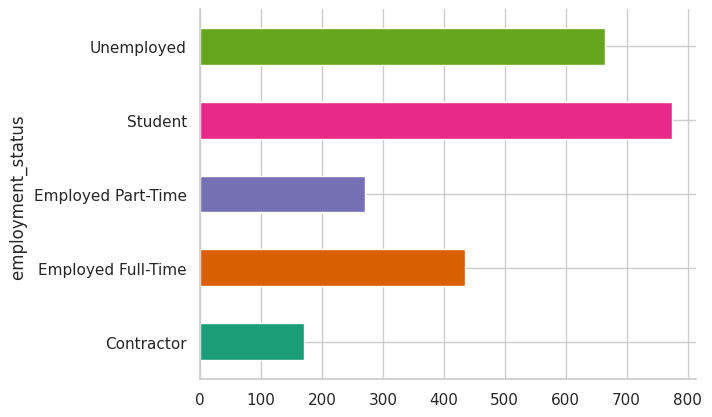

In [ ]:
# @title employment_status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('employment_status ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

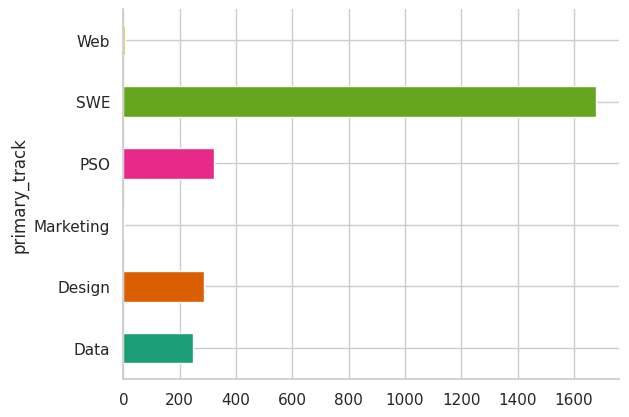

In [ ]:
# @title primary_track

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('primary_track').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Find rows with 3 or more missing values
rows_with_many_missing_values = df[df.isnull().sum(axis=1) >= 3]

# Display the rows
rows_with_many_missing_values
len(rows_with_many_missing_values)


49

In [ ]:
# Drop rows with null values in the 'program_duration_days' column
df = df.dropna(subset=['program_duration_days'])

In [ ]:
missing_counts = df.isnull().sum(axis=1)

df_cleaned = df[missing_counts < 3]

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1913 non-null   object 
 1   program_duration_days        1913 non-null   float64
 2   placed                       1913 non-null   int64  
 3   employment_status            1738 non-null   object 
 4   highest_level_of_education   1874 non-null   object 
 5   length_of_job_search         1853 non-null   object 
 6   biggest_challenge_in_search  1895 non-null   object 
 7   professional_experience      1760 non-null   object 
 8   work_authorization_status    1705 non-null   object 
 9   number_of_interviews         1747 non-null   float64
 10  number_of_applications       1913 non-null   int64  
 11  race                         1901 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 194.3+ KB


In [ ]:
# Fill null values in the 'race' column with the mode
race_mode = df['race'].mode()[0]
df['race'].fillna(race_mode, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1928 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       1928 non-null   int64  
 3   employment_status            1746 non-null   object 
 4   highest_level_of_education   1886 non-null   object 
 5   length_of_job_search         1862 non-null   object 
 6   biggest_challenge_in_search  1908 non-null   object 
 7   professional_experience      1767 non-null   object 
 8   work_authorization_status    1707 non-null   object 
 9   number_of_interviews         1756 non-null   float64
 10  number_of_applications       1928 non-null   int64  
 11  race                         1928 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 195.8+ KB
None


<ipython-input-84-a4f1c67d6394>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(race_mode, inplace=True)
<ipython-input-84-a4f1c67d6394>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'].fillna(race_mode, inplace=True)


In [ ]:
# Fill null values in the 'length_of_job_search,highest_level_of_education,'biggest_challenge_in_search' column with the mode
length_of_job_search_mode = df['length_of_job_search'].mode()[0]
df['length_of_job_search'].fillna(length_of_job_search_mode, inplace=True)

highest_level_of_education_mode = df['highest_level_of_education'].mode()[0]
df['highest_level_of_education'].fillna(highest_level_of_education_mode, inplace=True)

biggest_challenge_in_search_mode = df['biggest_challenge_in_search'].mode()[0]
df['biggest_challenge_in_search'].fillna(biggest_challenge_in_search_mode, inplace=True)


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1928 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       1928 non-null   int64  
 3   employment_status            1746 non-null   object 
 4   highest_level_of_education   1928 non-null   object 
 5   length_of_job_search         1928 non-null   object 
 6   biggest_challenge_in_search  1928 non-null   object 
 7   professional_experience      1767 non-null   object 
 8   work_authorization_status    1707 non-null   object 
 9   number_of_interviews         1756 non-null   float64
 10  number_of_applications       1928 non-null   int64  
 11  race                         1928 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 195.8+ KB
None


<ipython-input-85-6595910f2384>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['length_of_job_search'].fillna(length_of_job_search_mode, inplace=True)
<ipython-input-85-6595910f2384>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length_of_job_search'].fillna(length_of_job_search_mode, inplace=True)
<ipython-input-85-6595910f2384>:6

In [ ]:
# Fill null values in the 'employment_status' column using the frequency

value_counts = df['employment_status '].value_counts(normalize=True)


def fill_with_pattern_frequency(row, frequencies):
    if pd.isnull(row):
        return np.random.choice(frequencies.index, p=frequencies.values)
    return row

df['employment_status '] = df['employment_status '].apply(
    lambda x: fill_with_pattern_frequency(x, value_counts)
)

# Fill null values in the 'professional_experience' column using the frequency
value_counts = df['professional_experience'].value_counts(normalize=True)


def fill_with_pattern_frequency(row, frequencies):
    if pd.isnull(row):
        return np.random.choice(frequencies.index, p=frequencies.values)
    return row

df['professional_experience'] = df['professional_experience'].apply(
    lambda x: fill_with_pattern_frequency(x, value_counts)
)

# Fill null values in the 'work_authorization_status' column using the frequency
value_counts = df['work_authorization_status'].value_counts(normalize=True)


def fill_with_pattern_frequency(row, frequencies):
    if pd.isnull(row):
        return np.random.choice(frequencies.index, p=frequencies.values)
    return row

df['work_authorization_status'] = df['work_authorization_status'].apply(
    lambda x: fill_with_pattern_frequency(x, value_counts)
)



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1928 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       1928 non-null   int64  
 3   employment_status            1928 non-null   object 
 4   highest_level_of_education   1928 non-null   object 
 5   length_of_job_search         1928 non-null   object 
 6   biggest_challenge_in_search  1928 non-null   object 
 7   professional_experience      1928 non-null   object 
 8   work_authorization_status    1928 non-null   object 
 9   number_of_interviews         1756 non-null   float64
 10  number_of_applications       1928 non-null   int64  
 11  race                         1928 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 195.8+ KB


<ipython-input-86-4ce3b73b0801>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_status '] = df['employment_status '].apply(
<ipython-input-86-4ce3b73b0801>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['professional_experience'] = df['professional_experience'].apply(
<ipython-input-86-4ce3b73b0801>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
# Fill null values in the 'number_of_interviews' column using the average
average_number_of_interviews = df['number_of_interviews'].mean()
df['number_of_interviews'].fillna(average_number_of_interviews, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1928 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       1928 non-null   int64  
 3   employment_status            1928 non-null   object 
 4   highest_level_of_education   1928 non-null   object 
 5   length_of_job_search         1928 non-null   object 
 6   biggest_challenge_in_search  1928 non-null   object 
 7   professional_experience      1928 non-null   object 
 8   work_authorization_status    1928 non-null   object 
 9   number_of_interviews         1928 non-null   float64
 10  number_of_applications       1928 non-null   int64  
 11  race                         1928 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 195.8+ KB


<ipython-input-87-b911e093db9e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_interviews'].fillna(average_number_of_interviews, inplace=True)
<ipython-input-87-b911e093db9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_interviews'].fillna(average_number_of_interviews, inplace=True)


In [ ]:
df_cleaned = df

In [ ]:
# for the column number_of_interviews catagorise it to low less than 5 medium 5 to 10 and high more than 10

def categorize_interviews(num_interviews):
    if num_interviews < 5:
        return 0
    elif 5 <= num_interviews <= 10:
        return 1
    else:
        return 2

df_cleaned['interview_category'] = df_cleaned['number_of_interviews'].apply(categorize_interviews)


print(df_cleaned[['number_of_interviews', 'interview_category']].head())

   number_of_interviews  interview_category
2                   0.0                   0
3                   5.0                   1
4                  10.0                   1
5                   5.0                   1
6                   0.0                   0


<ipython-input-89-496c36cc455c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['interview_category'] = df_cleaned['number_of_interviews'].apply(categorize_interviews)


In [ ]:
# for the column number_of_applications catagorise it to low less than 5 medium 5 to 10 and high more than 10

def categorize_applications(num_applications):
    if num_applications < 50:
        return 0
    elif 50 <= num_applications <= 150:
        return 1
    else:
        return 2

df_cleaned['applications_category'] = df_cleaned['number_of_applications'].apply(categorize_applications)


print(df_cleaned[['number_of_applications', 'applications_category']].head())

   number_of_applications  applications_category
2                       0                      0
3                      25                      0
4                     100                      1
5                     100                      1
6                       9                      0


<ipython-input-90-ccf39203decb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['applications_category'] = df_cleaned['number_of_applications'].apply(categorize_applications)


In [ ]:
df_cleaned.drop(columns=["number_of_interviews","number_of_applications"],inplace=True)

<ipython-input-91-7ca4ac3a10f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=["number_of_interviews","number_of_applications"],inplace=True)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1928 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       1928 non-null   int64  
 3   employment_status            1928 non-null   object 
 4   highest_level_of_education   1928 non-null   object 
 5   length_of_job_search         1928 non-null   object 
 6   biggest_challenge_in_search  1928 non-null   object 
 7   professional_experience      1928 non-null   object 
 8   work_authorization_status    1928 non-null   object 
 9   race                         1928 non-null   object 
 10  interview_category           1928 non-null   int64  
 11  applications_category        1928 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 195.8+ KB


In [ ]:
# Convert length_of_job_search to numerical values
length_mapping = {
    'Less than one month': 0,
    '1-2 months': 1,
    '3-5 months': 3,
    '6 months to a year': 6,
    'Over a year': 12
}
df_cleaned['length_of_job_search'] = df_cleaned['length_of_job_search'].map(length_mapping)


<ipython-input-93-32d91071c9cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['length_of_job_search'] = df_cleaned['length_of_job_search'].map(length_mapping)


In [ ]:
df['program_duration_days'] = df['program_duration_days'].astype(int)

<ipython-input-94-3c53f83d7ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['program_duration_days'] = df['program_duration_days'].astype(int)


In [ ]:
df_cleaned.head()

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,race,interview_category,applications_category
2,Design,0,0,Employed Part-Time,Master's Degree,0,Figuring out which jobs to apply for,Less than one year,Citizen,East Asian or Asian American,0,0
3,PSO,0,0,Contractor,Bachelor's Degree,0,Getting past final round interviews,Less than one year,Citizen,Decline to Self Identify,1,0
4,SWE,89,1,Unemployed,Bachelor's Degree,1,Hearing back on my applications,1-2 years,F1 Visa/OPT,East Asian or Asian American,1,1
5,SWE,0,0,Employed Full-Time,Master's Degree,1,Technical interviewing,3-4 years,Green Card,East Asian or Asian American,1,1
6,SWE,0,0,Employed Full-Time,Master's Degree,0,Getting past phone screens,3-4 years,Green Card,"Black, Afro-Caribbean, or African American",0,0


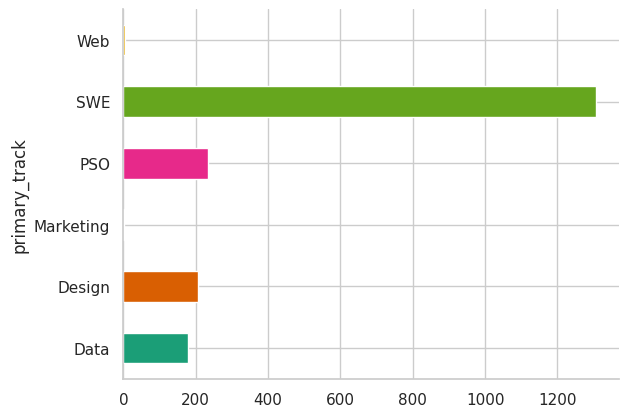

In [ ]:
# @title employment_status

from matplotlib import pyplot as plt
import seaborn as sns
df_cleaned.groupby('primary_track').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
primary_track_by_placed = df_cleaned.groupby('placed')['primary_track'].value_counts(normalize=True).unstack() * 100

print(primary_track_by_placed)

primary_track      Data     Design  Marketing        PSO        SWE       Web
placed                                                                       
0              9.259259  11.625514   0.102881  15.740741  62.962963  0.308642
1              9.205021   9.623431   0.104603   8.368201  72.594142  0.104603


In [ ]:
df_cleaned.head()

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,race,interview_category,applications_category
2,Design,0,0,Employed Part-Time,Master's Degree,0,Figuring out which jobs to apply for,Less than one year,Citizen,East Asian or Asian American,0,0
3,PSO,0,0,Contractor,Bachelor's Degree,0,Getting past final round interviews,Less than one year,Citizen,Decline to Self Identify,1,0
4,SWE,89,1,Unemployed,Bachelor's Degree,1,Hearing back on my applications,1-2 years,F1 Visa/OPT,East Asian or Asian American,1,1
5,SWE,0,0,Employed Full-Time,Master's Degree,1,Technical interviewing,3-4 years,Green Card,East Asian or Asian American,1,1
6,SWE,0,0,Employed Full-Time,Master's Degree,0,Getting past phone screens,3-4 years,Green Card,"Black, Afro-Caribbean, or African American",0,0


In [ ]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   primary_track                1928 non-null   object
 1   program_duration_days        1928 non-null   int64 
 2   placed                       1928 non-null   int64 
 3   employment_status            1928 non-null   object
 4   highest_level_of_education   1928 non-null   object
 5   length_of_job_search         1928 non-null   int64 
 6   biggest_challenge_in_search  1928 non-null   object
 7   professional_experience      1928 non-null   object
 8   work_authorization_status    1928 non-null   object
 9   race                         1928 non-null   object
 10  interview_category           1928 non-null   int64 
 11  applications_category        1928 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 195.8+ KB


## correlation matrix

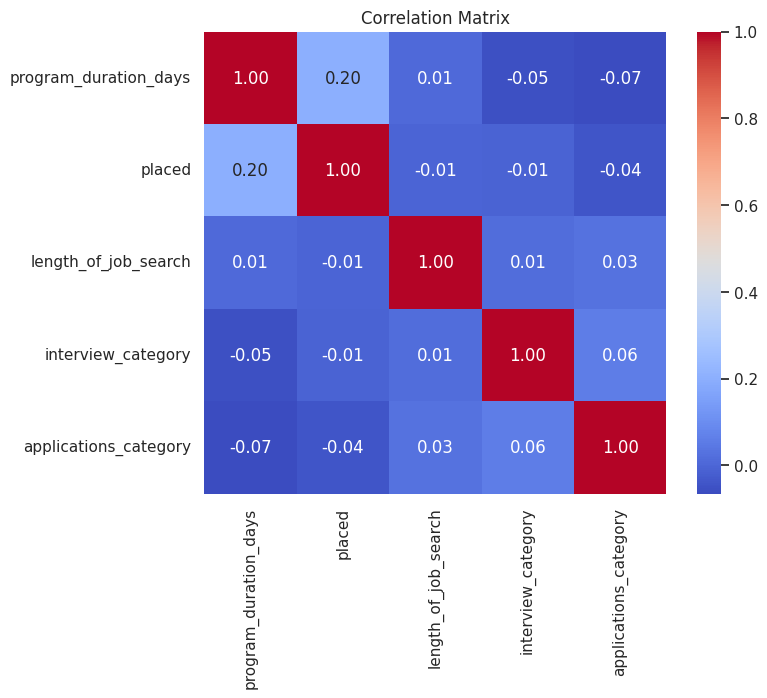

In [ ]:
numerical_vars = ['program_duration_days', 'placed','length_of_job_search', 'interview_category','applications_category']

correlation_matrix = df[numerical_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['length_of_job_search'].value_counts()

,count
length_of_job_search,
0,687
1,610
3,372
6,171
12,88


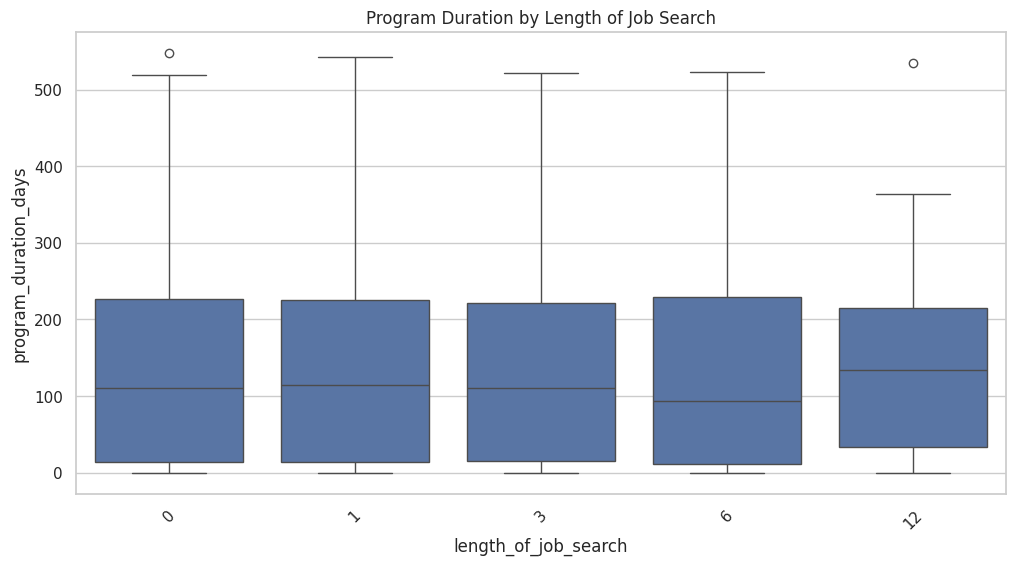

In [ ]:
# Boxplot to analyze the relationship between program duration and length of job search
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='length_of_job_search', y='program_duration_days')
plt.title('Program Duration by Length of Job Search')
plt.xticks(rotation=45)
plt.show()



In [ ]:

contingency_table = pd.crosstab(df_cleaned['employment_status '], df_cleaned['interview_category'])

print(contingency_table)

contingency_table.index.name = 'Employment Status'
contingency_table.columns.name = 'Interview Category'

print("\nContingency Table:")
print(contingency_table)

interview_category    0   1   2
employment_status              
Contractor          126  19   1
Employed Full-Time  316  37   8
Employed Part-Time  184  29   4
Student             536  88  13
Unemployed          490  71   6

Contingency Table:
Interview Category    0   1   2
Employment Status              
Contractor          126  19   1
Employed Full-Time  316  37   8
Employed Part-Time  184  29   4
Student             536  88  13
Unemployed          490  71   6


## Making the preprocessed dataframe

In [ ]:
required_columns = ['primary_track', 'employment_status ', 'highest_level_of_education',
                     'biggest_challenge_in_search','professional_experience', 'work_authorization_status',
                    'race']



In [ ]:
df_preprocessed = pd.get_dummies(data=df_cleaned, columns=required_columns, dtype=int)

In [ ]:
df_preprocessed.head()

,program_duration_days,placed,length_of_job_search,interview_category,applications_category,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,...,work_authorization_status_STEM OPT,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,89,1,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 55 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   program_duration_days                                             1928 non-null   int64
 1   placed                                                            1928 non-null   int64
 2   length_of_job_search                                              1928 non-null   int64
 3   interview_category                                                1928 non-null   int64
 4   applications_category                                             1928 non-null   int64
 5   primary_track_Data                                                1928 non-null   int64
 6   primary_track_Design                                              1928 non-null   int64
 7   primary_track_Marketing                                 

In [ ]:
df.to_csv('df_preprocessed.csv', index= False)

## Procrssing the Data

## Classifying wether they can find a job pr not using logistic regression

Defining X,Y

In [ ]:
X = df_preprocessed.drop("placed", axis=1)
Y = df_preprocessed["placed"]

In [ ]:
X

,program_duration_days,length_of_job_search,interview_category,applications_category,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,...,work_authorization_status_STEM OPT,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,89,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2538,118,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2539,457,6,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2540,488,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## standardizing the features

In [ ]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.08162712, -0.70193645, -0.39042055, ..., -0.52292238,
        -0.52774481, -0.19120444],
       [-1.08162712, -0.70193645,  2.0535107 , ..., -0.52292238,
        -0.52774481, -0.19120444],
       [-0.37431014, -0.34654426,  2.0535107 , ..., -0.52292238,
        -0.52774481, -0.19120444],
       ...,
       [ 2.55032635,  1.43041671, -0.39042055, ...,  1.91232969,
        -0.52774481, -0.19120444],
       [ 2.79669519,  0.36424013, -0.39042055, ...,  1.91232969,
        -0.52774481, -0.19120444],
       [ 1.18337669, -0.34654426, -0.39042055, ...,  1.91232969,
        -0.52774481, -0.19120444]])

In [ ]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

### Logistic regression

## Logistic Regression

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
Y_pred_logreg = logreg.predict(X_test)

## Random Forest Classifier

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)


In [ ]:
# Evaluate the models
logreg_accuracy = accuracy_score(Y_test, Y_pred_logreg)
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print("\nLogistic Regression Accuracy:", logreg_accuracy)
print("\nRandom Forest Accuracy:", rf_accuracy)



Logistic Regression Accuracy: 0.616580310880829

Random Forest Accuracy: 0.7668393782383419


## visualization

<ipython-input-119-9d37ce8d53a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


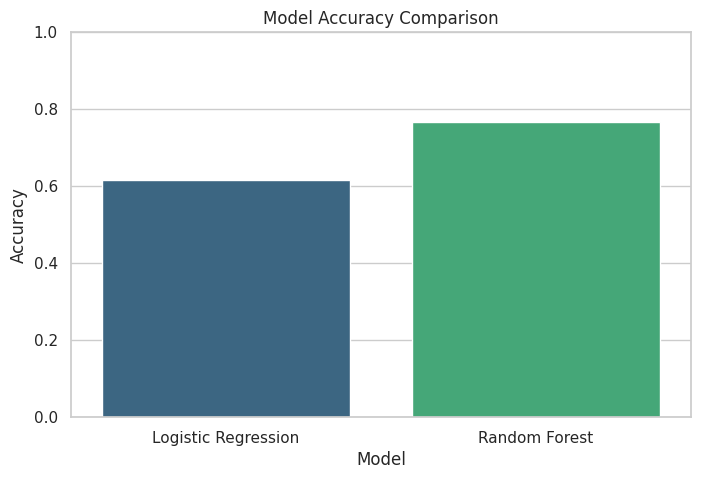

In [ ]:

model_names = ['Logistic Regression', 'Random Forest']
accuracies = [logreg_accuracy, rf_accuracy]

results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})


sns.set(style="whitegrid")

# Create a bar plot to compare model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Classification Reports

In [ ]:
# Classification Reports
print("\nLogistic Regression Classification Report:")
print(classification_report(Y_test, Y_pred_logreg))

print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       298
           1       0.60      0.63      0.61       281

    accuracy                           0.62       579
   macro avg       0.62      0.62      0.62       579
weighted avg       0.62      0.62      0.62       579


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       298
           1       0.72      0.85      0.78       281

    accuracy                           0.77       579
   macro avg       0.78      0.77      0.77       579
weighted avg       0.78      0.77      0.77       579



Confusion Matrix for Logistic Regression:
 [[181 117]
 [105 176]]


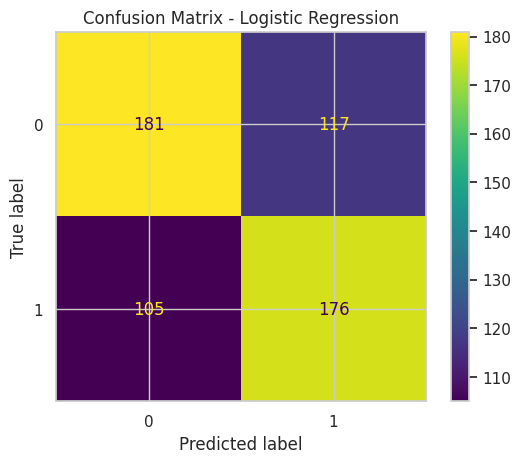

Confusion Matrix for Random Forest:
 [[204  94]
 [ 41 240]]


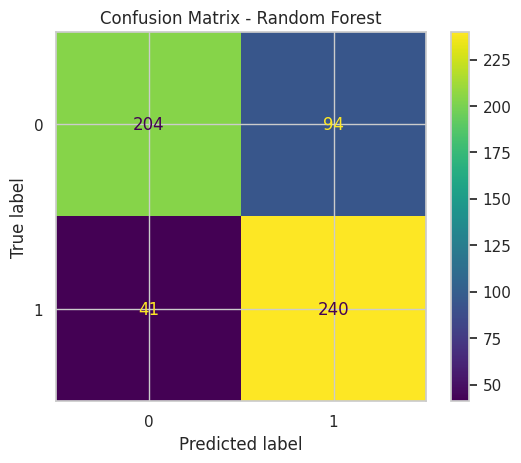

In [ ]:
from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(Y_test, Y_pred_logreg)
print("Confusion Matrix for Logistic Regression:\n", cm_logreg)

# Get the unique class labels
labels = np.unique(np.concatenate((Y_test, Y_pred_logreg)))

# Create the ConfusionMatrixDisplay with the correct labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=labels)

disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix for Random Forest:\n", cm_rf)

# Get the unique class labels for Random Forest
labels_rf = np.unique(np.concatenate((Y_test, Y_pred_rf)))

# Create the ConfusionMatrixDisplay with the correct labels for Random Forest
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=labels_rf)

disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

for predicting the plcement of the pathrise users

Two models were evaluated: Logistic Regression and Random Forest Classifier. The Logistic Regression model achieved an accuracy of approximately 59%, and the #Random Forest Classifier around 75%. The classification reports shows that the Random Forest model not only provides better overall accuracy but also demonstrates better result in precision and recall for both classes (placed and not placed).  so, the Random Forest Classifier has a better due to its higher accuracy and better performance metrics.

# Predicting the length of job search


In [ ]:
#  Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


# Define features and target variable for classification
X = df_preprocessed.drop("length_of_job_search", axis=1)  # Features
Y = df_preprocessed['length_of_job_search']  # Target variable


# Fit and transform the target variable to consecutive integers
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=100),
    "XGBoost": xgb.XGBClassifier(objective='multi:softmax', n_estimators=100, learning_rate=0.1, random_state=100)
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Make predictions
    Y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)

    # Get unique labels in Y_test for classification_report
    unique_labels = sorted(set(Y_test))

    report = classification_report(Y_test, Y_pred, labels=unique_labels, output_dict=True)

    # Store results dynamically based on available labels
    results[model_name] = {"Accuracy": accuracy}
    for label in unique_labels:
        results[model_name][f"Precision ({label})"] = report[str(label)]['precision']
        results[model_name][f"Recall ({label})"] = report[str(label)]['recall']
        results[model_name][f"F1 Score ({label})"] = report[str(label)]['f1-score']

# Display results
results_df = pd.DataFrame(results).T
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                   Accuracy  Precision (0)  Recall (0)  F1 Score (0)  \
Random Forest      0.322971       0.361775    0.519608      0.426559   
Gradient Boosting  0.317789       0.362126    0.534314      0.431683   
XGBoost            0.316062       0.359259    0.475490      0.409283   

                   Precision (1)  Recall (1)  F1 Score (1)  Precision (2)  \
Random Forest           0.305936    0.380682      0.339241       0.224138   
Gradient Boosting       0.286432    0.323864      0.304000       0.208955   
XGBoost                 0.305936    0.380682      0.339241       0.228571   

                   Recall (2)  F1 Score (2)  Precision (3)  Recall (3)  \
Random Forest        0.108333      0.146067       0.125000    0.018868   
Gradient Boosting    0.116667      0.149733       0.300000    0.056604   
XGBoost              0.133333      0.168421       0.111111    0.037736   

                   F1 Score (3)  Precision (4)  Recall (4)  F1 Score (4)  
Rand

###The model comparison results indicate that all three classification models—Random Forest, Gradient Boosting, and XGBoost—exhibit relatively low performance in predicting the length of job search, with accuracy scores ranging from approximately 32% to 34%. Among these, Gradient Boosting emerges as the best-performing model, achieving the highest accuracy of 33.5% and the best F1 score for the category mapped to "1-2 months" (0.33), as well as improved recall for this category (0.35).